# Importing Libraries and Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
sns.set()

In [3]:
df = pd.read_csv("ValidationSheet.csv")
dataset = df.copy()
dataset.head(2)

,Sr. No,Timestamp,Email Address,City,Sub Division,Year of Installation,Project Name,Cust Name,Mo. No,Meter Installation Date,...,Check List 5: Wire Dressing is ok?,Check List 6: Wifi Connection is ok?,Check List 7: Tightness of U & Z clamp is ok?,Check List 8: Colour of Welding Joint is ok?,Check List 9: Concrete Block is there?,Check List 10: Visual checking of all parts,System Image,Observation,Customer Request,Unnamed: 43
0,#NAME?,7/7/2021 12:15,NaN,Vadodara,VASANA S_D,2018-19,2018-19R0273,RAJESHWAR SHIVAJI THAKUR,##############################################...,1/28/2019,...,Yes,Yes,Yes,Yes,No need,Yes,0,System working fine,Re configuration of wifi,NaN
1,#NAME?,7/8/2021 21:47,hitendrasinh15179@gmail.com,Vadodara,VASANA S_D,2018-19,2018-19R0216,PATEL JITENDRA HASMUKHBHAI,##############################################...,2/23/2019,...,Yes,Not available,Yes,Yes,02 block concrete work panding,Yes,0,Concrete block work panding,Customer ask for maintenance recipt,NaN


# Data Preprocessing

In [4]:
dataset.isnull().sum()
# if the corresponding outputs are zero then there is no missing data

Sr. No                                                         22
Timestamp                                                      18
Email Address                                                  19
City                                                           18
Sub Division                                                   22
Year of Installation                                           18
Project Name                                                   18
Cust Name                                                      26
Mo. No                                                         26
Meter Installation Date                                        26
PV Cap. from master file                                       26
Village                                                        14
Visit Time                                                     14
PV Cap. from Form                                              14
Ref. DC V                                                      14
Actual DC 

In [5]:
columnList = []
columnList = dataset.columns.values
print(columnList)
len(columnList)
# printing the columns in list

['Sr. No' 'Timestamp' 'Email Address' 'City' 'Sub Division'
 'Year of Installation' 'Project Name' 'Cust Name' 'Mo. No'
 'Meter Installation Date' 'PV Cap. from master file' 'Village'
 'Visit Time' 'PV Cap. from Form' 'Ref. DC V' 'Actual DC V'
 'String 1: DC V' 'String 1: DC A' 'String 2: DC V' 'String 2: DC A'
 'AC V' 'AC A' 'Power (W)' 'E-Today (kWh)' 'E-Total (kWh)'
 'Gen. in Solar meter (kWh) ' 'Avg. Solar generation per kW' 'Verified'
 'Remark' 'Current Status of Inverter'
 'Check List 1: Connection tightness of AC/DC box is ok?'
 'Check List 2: Tightness nearer to meter connection is ok?'
 'Check List 3: Connection of Earthing & L.A. is ok?'
 'Check List 4: DC/AC connector is ok?'
 'Check List 5: Wire Dressing is ok?'
 'Check List 6: Wifi Connection is ok?'
 'Check List 7: Tightness of U & Z clamp is ok?'
 'Check List 8: Colour of  Welding Joint is ok?'
 'Check List 9: Concrete Block is there?'
 'Check  List 10: Visual checking of all parts' 'System Image'
 'Observation' 'Custome

44

In [6]:
columnToDrop = [0, 1, 2, 3, 7, 8, 10, 12, 28, 40, 42, 43]
columnDropped = []
for i in columnToDrop:
    placeHolder = columnList[i]
    columnDropped.append(placeHolder)
    dataset.drop([placeHolder], axis = 1, inplace = True)
# here we have selected the columns that we dont want in our dataset

In [7]:
print("Columns dropped-> ", columnDropped)

Columns dropped->  ['Sr. No', 'Timestamp', 'Email Address', 'City', 'Cust Name', 'Mo. No', 'PV Cap. from master file', 'Visit Time', 'Remark', 'System Image', 'Customer Request ', 'Unnamed: 43']


#### CheckPoint 1: Creating New CSV with updated data

In [8]:
dataset.to_csv('Updated_ValidationSheet.csv')

## Dealing with missing Data

In [9]:
df = pd.read_csv("Updated_ValidationSheet.csv")
dataset = df.copy()
dataset.head(2)

,Unnamed: 0,Sub Division,Year of Installation,Project Name,Meter Installation Date,Village,PV Cap. from Form,Ref. DC V,Actual DC V,String 1: DC V,...,Check List 2: Tightness nearer to meter connection is ok?,Check List 3: Connection of Earthing & L.A. is ok?,Check List 4: DC/AC connector is ok?,Check List 5: Wire Dressing is ok?,Check List 6: Wifi Connection is ok?,Check List 7: Tightness of U & Z clamp is ok?,Check List 8: Colour of Welding Joint is ok?,Check List 9: Concrete Block is there?,Check List 10: Visual checking of all parts,Observation
0,0,VASANA S_D,2018-19,2018-19R0273,1/28/2019,Gulab vatika vasana div,3.25,300,311.1,311.1,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No need,Yes,System working fine
1,1,VASANA S_D,2018-19,2018-19R0216,2/23/2019,Vadodara,3.25,300,310.0,310.0,...,Yes,Yes,Yes,Yes,Not available,Yes,Yes,02 block concrete work panding,Yes,Concrete block work panding


In [10]:
columnToDrop = 0
columnList = []
columnList = dataset.columns.values
placeHolder = columnList[0]
dataset.drop([placeHolder], axis = 1, inplace = True)
# here we dropped unnamed

In [11]:
dataset.head(2)

,Sub Division,Year of Installation,Project Name,Meter Installation Date,Village,PV Cap. from Form,Ref. DC V,Actual DC V,String 1: DC V,String 1: DC A,...,Check List 2: Tightness nearer to meter connection is ok?,Check List 3: Connection of Earthing & L.A. is ok?,Check List 4: DC/AC connector is ok?,Check List 5: Wire Dressing is ok?,Check List 6: Wifi Connection is ok?,Check List 7: Tightness of U & Z clamp is ok?,Check List 8: Colour of Welding Joint is ok?,Check List 9: Concrete Block is there?,Check List 10: Visual checking of all parts,Observation
0,VASANA S_D,2018-19,2018-19R0273,1/28/2019,Gulab vatika vasana div,3.25,300,311.1,311.1,6.7,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No need,Yes,System working fine
1,VASANA S_D,2018-19,2018-19R0216,2/23/2019,Vadodara,3.25,300,310.0,310.0,6.6,...,Yes,Yes,Yes,Yes,Not available,Yes,Yes,02 block concrete work panding,Yes,Concrete block work panding


In [12]:
dataset.isnull().sum()

Sub Division                                                  22
Year of Installation                                          18
Project Name                                                  18
Meter Installation Date                                       26
Village                                                       14
PV Cap. from Form                                             14
Ref. DC V                                                     14
Actual DC V                                                   14
String 1: DC V                                                14
String 1: DC A                                                14
String 2: DC V                                                14
String 2: DC A                                                14
AC V                                                          14
AC A                                                          14
Power (W)                                                     14
E-Today (kWh)            

### Working with "Sub Division"

In [13]:
value_counts = dataset['Sub Division'].value_counts()
# changing the python.series to dict
dictColm = value_counts.to_dict()

In [14]:
c = 3
for k, v in dictColm.items():
    print(k, v)
    c=c-1
    if (c == 0):
        break

BARDOLI (R) SDN 76
TORRENT 72
PALSANA 63


In [15]:
modeList = []
updatedModeList = []
for k, v in dictColm.items():
    modeList.append(v)
modeList.sort()
c = 3
for i in range ((len(modeList)-1),0, -1):
    l = modeList[i]
    updatedModeList.append(l)
    c=c-1
    if (c == 0):
        break
    
print(updatedModeList)
lengthOfList = len(updatedModeList)
# these are the values of the keys that have occured the most, and keys can be fectched from dictColm


[76, 72, 63]


In [16]:
# getting the keys with the help of values
keysUpdatedModeLost = []
for k, v in dictColm.items():
    if v in updatedModeList:
        keysUpdatedModeLost.append(k)
print(keysUpdatedModeLost)

['BARDOLI (R) SDN', 'TORRENT', 'PALSANA']


In [17]:
# finding empty cells in sub division
emptyCells = pd.isna(dataset['Sub Division'])
emptyCells = emptyCells.to_dict()

emptyCellsList =[]
for k, v in emptyCells.items():
    if (v == True):
        emptyCellsList.append(k)
print(len(emptyCellsList))
print(emptyCellsList)

22
[1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199]


In [18]:
# replacing the empty cells with a random mode
import random as r
for i in emptyCellsList:
    randomNumber = r.randint(0, (lengthOfList-1))
    keyHolder = keysUpdatedModeLost[randomNumber]
    dataset['Sub Division'][i] = keyHolder
    print(keyHolder)

BARDOLI (R) SDN
BARDOLI (R) SDN
BARDOLI (R) SDN
PALSANA
BARDOLI (R) SDN
PALSANA
PALSANA
BARDOLI (R) SDN
PALSANA
BARDOLI (R) SDN
BARDOLI (R) SDN
TORRENT
PALSANA
PALSANA
PALSANA
PALSANA
TORRENT
TORRENT
PALSANA
TORRENT
TORRENT
BARDOLI (R) SDN


C:\Users\bires\AppData\Local\Temp\ipykernel_46272\4077553895.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Sub Division'][i] = keyHolder
C:\Users\bires\AppData\Local\Temp\ipykernel_46272\4077553895.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Sub Division'][i] = keyHolder
C:\Users\bires\AppData\Local\Temp\ipykernel_46272\4077553895.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Sub Division'

In [19]:
# Cross Checking
emptyCells = pd.isna(dataset['Sub Division'])
emptyCells = emptyCells.to_dict()

emptyCellsList =[]
for k, v in emptyCells.items():
    if (v == True):
        emptyCellsList.append(k)
print(len(emptyCellsList))

0


### Making a generalize function for the same

In [20]:
def emptyCellMode(ColumnName):
    value_counts = dataset[ColumnName].value_counts()
    dictColm = value_counts.to_dict()
    # ---------------------------------------------------- #
    
    print("\nGlimpse of the most occuring cell value")
    c = 3
    for k, v in dictColm.items():
        print(k, v)
        c=c-1
        if (c == 0):
            break
    modeList = []
    updatedModeList = []
    for k, v in dictColm.items():
        modeList.append(v)
    modeList.sort()
    c = 3
    for i in range ((len(modeList)-1),0, -1):
        l = modeList[i]
        updatedModeList.append(l)
        c=c-1
        if (c == 0):
            break
    # ---------------------------------------------------- #
    
    print("\nThese are the values of the keys that have occured the most.")
    print(updatedModeList)
    lengthOfList = len(updatedModeList)
    # ---------------------------------------------------- #
    
    print("\nGetting the keys with the help of values")
    keysUpdatedModeLost = []
    for k, v in dictColm.items():
        if v in updatedModeList:
            keysUpdatedModeLost.append(k)
    print(keysUpdatedModeLost)
    # ---------------------------------------------------- #

    print("\nFinding empty cells")
    emptyCells = pd.isna(dataset[ColumnName])
    emptyCells = emptyCells.to_dict()
    emptyCellsList =[]
    for k, v in emptyCells.items():
        if (v == True):
            emptyCellsList.append(k)
    print("length-> ", len(emptyCellsList))
    print("\nThe following are the empty cells")
    print(emptyCellsList)
    # ---------------------------------------------------- #
    
    print("\nReplacing the empty cells with a random mode")
    import random as r
    for i in emptyCellsList:
        randomNumber = r.randint(0, (lengthOfList-1))
        keyHolder = keysUpdatedModeLost[randomNumber]
        dataset[ColumnName][i] = keyHolder
        print(keyHolder)
    # ---------------------------------------------------- #
        
    print("\n Cross Check")
    emptyCells = pd.isna(dataset[ColumnName])
    emptyCells = emptyCells.to_dict()

    emptyCellsList =[]
    for k, v in emptyCells.items():
        if (v == True):
            emptyCellsList.append(k)
    print(len(emptyCellsList))


In [21]:
def crossCheck(CN):
    emptyCells = pd.isna(dataset[CN])
    emptyCells = emptyCells.to_dict()

    emptyCellsList =[]
    for k, v in emptyCells.items():
        if (v == True):
            emptyCellsList.append(k)
    print(len(emptyCellsList))

#### Checking the fucntion with one column

In [22]:
emptyCellMode("Year of Installation")


Glimpse of the most occuring cell value
2019-20 743
2018-19 313
2017-18 61

These are the values of the keys that have occured the most.
[743, 313, 61]

Getting the keys with the help of values
['2019-20', '2018-19', '2017-18']

Finding empty cells
length->  18

The following are the empty cells
[1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199]

Replacing the empty cells with a random mode
2017-18
2017-18
2019-20
2017-18
2019-20
2018-19
2018-19
2019-20
2018-19
2019-20
2018-19
2019-20
2019-20
2017-18
2019-20
2019-20
2018-19
2018-19

 Cross Check
0


C:\Users\bires\AppData\Local\Temp\ipykernel_46272\1517578913.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[ColumnName][i] = keyHolder
C:\Users\bires\AppData\Local\Temp\ipykernel_46272\1517578913.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[ColumnName][i] = keyHolder
C:\Users\bires\AppData\Local\Temp\ipykernel_46272\1517578913.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[ColumnName][i] = ke

In [23]:
crossCheck("Year of Installation")

0


### Automating the process of calling the function

In [24]:
myColumns = dataset.isnull().sum()
print(type(myColumns))
myColumns = myColumns.to_dict()
print(type(myColumns))
print()
for k, v in myColumns.items():
    print(k, v)
myColumns.pop("Sub Division")
myColumns.pop("Year of Installation")

<class 'pandas.core.series.Series'>
<class 'dict'>

Sub Division 0
Year of Installation 0
Project Name 18
Meter Installation Date 26
Village 14
PV Cap. from Form 14
Ref. DC V 14
Actual DC V 14
String 1: DC V 14
String 1: DC A 14
String 2: DC V 14
String 2: DC A 14
AC V 14
AC A 14
Power (W) 14
E-Today (kWh) 14
E-Total (kWh) 14
Gen. in Solar meter (kWh)  14
Avg. Solar generation per kW 26
Verified 195
Current Status of Inverter 16
Check List 1: Connection tightness of AC/DC box is ok? 16
Check List 2: Tightness nearer to meter connection is ok? 16
Check List 3: Connection of Earthing & L.A. is ok? 16
Check List 4: DC/AC connector is ok? 16
Check List 5: Wire Dressing is ok? 16
Check List 6: Wifi Connection is ok? 17
Check List 7: Tightness of U & Z clamp is ok? 16
Check List 8: Colour of  Welding Joint is ok? 16
Check List 9: Concrete Block is there? 24
Check  List 10: Visual checking of all parts 16
Observation 16


0

In [25]:
for k, v in myColumns.items():
    print(k, v)

Project Name 18
Meter Installation Date 26
Village 14
PV Cap. from Form 14
Ref. DC V 14
Actual DC V 14
String 1: DC V 14
String 1: DC A 14
String 2: DC V 14
String 2: DC A 14
AC V 14
AC A 14
Power (W) 14
E-Today (kWh) 14
E-Total (kWh) 14
Gen. in Solar meter (kWh)  14
Avg. Solar generation per kW 26
Verified 195
Current Status of Inverter 16
Check List 1: Connection tightness of AC/DC box is ok? 16
Check List 2: Tightness nearer to meter connection is ok? 16
Check List 3: Connection of Earthing & L.A. is ok? 16
Check List 4: DC/AC connector is ok? 16
Check List 5: Wire Dressing is ok? 16
Check List 6: Wifi Connection is ok? 17
Check List 7: Tightness of U & Z clamp is ok? 16
Check List 8: Colour of  Welding Joint is ok? 16
Check List 9: Concrete Block is there? 24
Check  List 10: Visual checking of all parts 16
Observation 16


In [26]:
for k, v in myColumns.items():
    emptyCellMode(k)


Glimpse of the most occuring cell value
0 4
2019-20R0079 3
2019-20R0814 3

These are the values of the keys that have occured the most.
[4, 3, 3]

Getting the keys with the help of values
['0', '2019-20R0079', '2019-20R0814']

Finding empty cells
length->  18

The following are the empty cells
[1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199]

Replacing the empty cells with a random mode
0
2019-20R0079
2019-20R0814
0
0
0
2019-20R0079
2019-20R0814
2019-20R0079
0
2019-20R0079
2019-20R0814
2019-20R0079
2019-20R0814
2019-20R0814
0
2019-20R0814
2019-20R0079

 Cross Check
0

Glimpse of the most occuring cell value
2/28/2020 18
6/19/2020 17
7/25/2020 15

These are the values of the keys that have occured the most.
[18, 17, 15]

Getting the keys with the help of values
['2/28/2020', '6/19/2020', '7/25/2020', '6/18/2020']

Finding empty cells
length->  26

The following are the empty cells
[820, 823, 856, 1172, 1178, 1179, 1180, 1181, 

C:\Users\bires\AppData\Local\Temp\ipykernel_46272\1517578913.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[ColumnName][i] = keyHolder
C:\Users\bires\AppData\Local\Temp\ipykernel_46272\1517578913.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[ColumnName][i] = keyHolder
C:\Users\bires\AppData\Local\Temp\ipykernel_46272\1517578913.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[ColumnName][i] = ke

## Checking the Dataset again after preprocessing

In [27]:
dataset.head(6)

,Sub Division,Year of Installation,Project Name,Meter Installation Date,Village,PV Cap. from Form,Ref. DC V,Actual DC V,String 1: DC V,String 1: DC A,...,Check List 2: Tightness nearer to meter connection is ok?,Check List 3: Connection of Earthing & L.A. is ok?,Check List 4: DC/AC connector is ok?,Check List 5: Wire Dressing is ok?,Check List 6: Wifi Connection is ok?,Check List 7: Tightness of U & Z clamp is ok?,Check List 8: Colour of Welding Joint is ok?,Check List 9: Concrete Block is there?,Check List 10: Visual checking of all parts,Observation
0,VASANA S_D,2018-19,2018-19R0273,1/28/2019,Gulab vatika vasana div,3.25,300,311.1,311.1,6.70,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No need,Yes,System working fine
1,VASANA S_D,2018-19,2018-19R0216,2/23/2019,Vadodara,3.25,300,310.0,310.0,6.60,...,Yes,Yes,Yes,Yes,Not available,Yes,Yes,02 block concrete work panding,Yes,Concrete block work panding
2,VASANA S_D,2017-18,2017-18R0067,2/4/2018,Vadodara,1.92,180,183.4,183.4,7.01,...,Yes,Yes,Yes,Yes,WiFi user ID not supported,Yes,Yes,Not applicable,Yes,Na
3,VASANA S_D,2019-20,2019-20R0252,1/8/2020,Vadodara,3.30,300,353.0,353.0,5.30,...,Yes,Yes,Yes,Yes,WiFi not in range,Yes,Yes,03 block concrete work panding,Yes,Concrete work panding
4,VASANA S_D,2019-20,2019-20R0253,1/8/2020,Vadodara,3.30,300,338.0,338.0,5.40,...,Yes,Yes,Yes,Yes,WiFi user name not supported,Yes,Yes,Yes,Yes,Na
5,AKOTA CITY S_D,2018-19,2018-19R0287,1/28/2019,Orchid bunglow,5.20,480,514.0,254.0,4.40,...,Yes,Yes,Yes,Yes,Not working at residence,Yes,Yes,No need,Yes,Work fine


In [28]:
# Final check for missing values.
dataset.isnull().sum()

Sub Division                                                 0
Year of Installation                                         0
Project Name                                                 0
Meter Installation Date                                      0
Village                                                      0
PV Cap. from Form                                            0
Ref. DC V                                                    0
Actual DC V                                                  0
String 1: DC V                                               0
String 1: DC A                                               0
String 2: DC V                                               0
String 2: DC A                                               0
AC V                                                         0
AC A                                                         0
Power (W)                                                    0
E-Today (kWh)                                          

## Finding Outliers

In [29]:
dataframe = dataset.copy()

In [30]:
dataTypes = dataframe.dtypes
print(dataTypes)
print(type(dataTypes))
dataTypes = dataTypes.to_dict()

Sub Division                                                  object
Year of Installation                                          object
Project Name                                                  object
Meter Installation Date                                       object
Village                                                       object
PV Cap. from Form                                            float64
Ref. DC V                                                     object
Actual DC V                                                  float64
String 1: DC V                                               float64
String 1: DC A                                               float64
String 2: DC V                                               float64
String 2: DC A                                               float64
AC V                                                         float64
AC A                                                         float64
Power (W)                         

In [31]:
floatColmList = []
for k, v in dataTypes.items():
    if (v == float):
        floatColmList.append(k)
print(floatColmList)

['PV Cap. from Form', 'Actual DC V', 'String 1: DC V', 'String 1: DC A', 'String 2: DC V', 'String 2: DC A', 'AC V', 'AC A', 'Power (W)', 'E-Total (kWh)', 'Gen. in Solar meter (kWh) ']


#### using box plot to find the outliners

In [32]:
def outLinerFinder(Name):
    sns.boxplot(dataframe[Name]).set(title=Name)
    data = dataframe[Name].describe()
    print(data)
    

count    1200.000000
mean        4.185754
std         1.774199
min         0.000000
25%         3.000000
50%         3.300000
75%         5.200000
max        20.000000
Name: PV Cap. from Form, dtype: float64


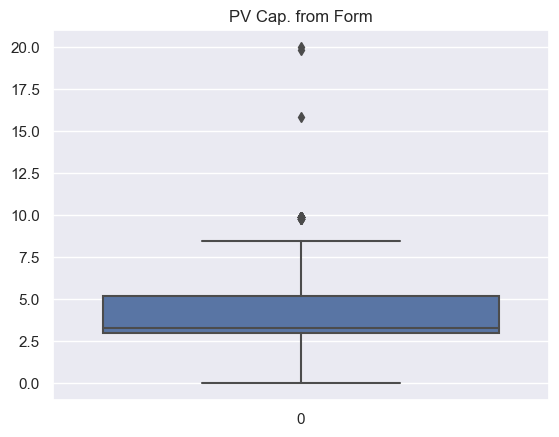

In [33]:
i = floatColmList[0]
outLinerFinder(i)

count    1200.000000
mean      421.513667
std       173.402510
min         0.000000
25%       316.000000
50%       346.000000
75%       519.000000
max      1392.100000
Name: Actual DC V, dtype: float64


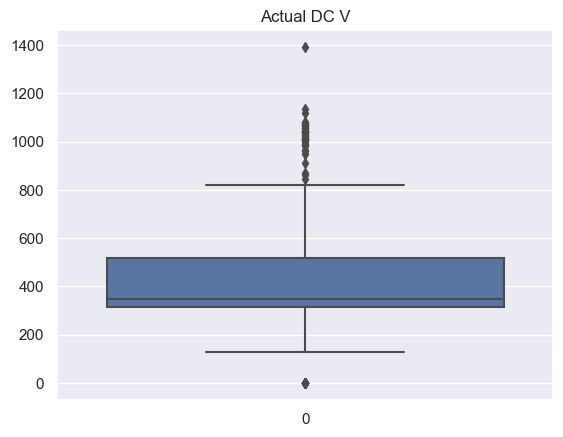

In [34]:
i = floatColmList[1]
outLinerFinder(i)

count    1200.000000
mean      301.871750
std        68.274759
min         0.000000
25%       265.000000
50%       306.000000
75%       332.000000
max       679.300000
Name: String 1: DC V, dtype: float64


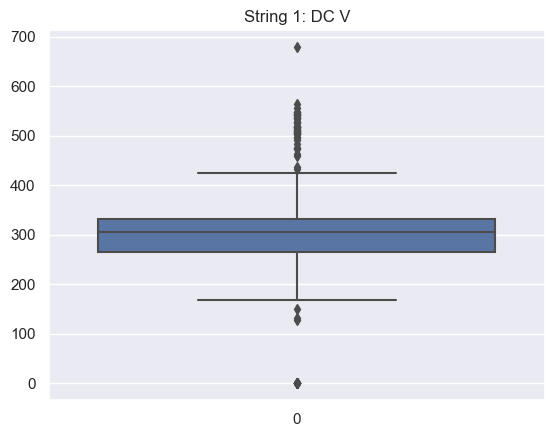

In [35]:
i = floatColmList[2]
outLinerFinder(i)

count    1200.000000
mean        3.942525
std         2.259625
min         0.000000
25%         2.200000
50%         3.900000
75%         5.600000
max        13.700000
Name: String 1: DC A, dtype: float64


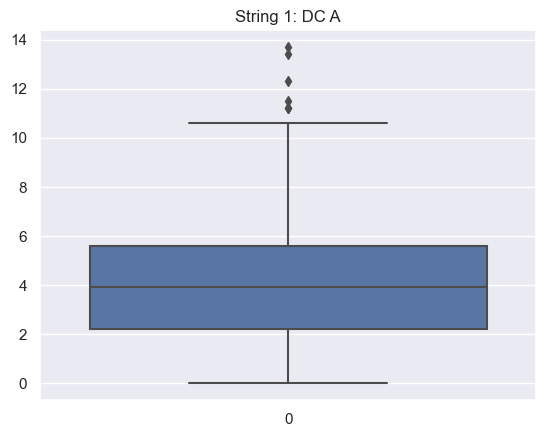

In [36]:
i = floatColmList[3]
outLinerFinder(i)

count    1200.000000
mean      121.062750
std       152.208158
min         0.000000
25%         0.000000
50%         0.000000
75%       262.000000
max       712.800000
Name: String 2: DC V, dtype: float64


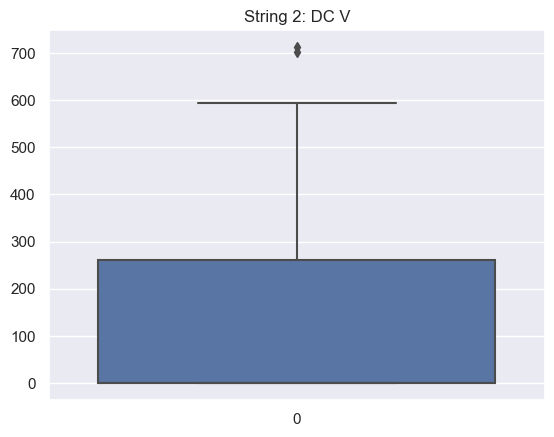

In [37]:
i = floatColmList[4]
outLinerFinder(i)

count    1200.000000
mean        1.660967
std         2.409662
min         0.000000
25%         0.000000
50%         0.000000
75%         3.300000
max        10.200000
Name: String 2: DC A, dtype: float64


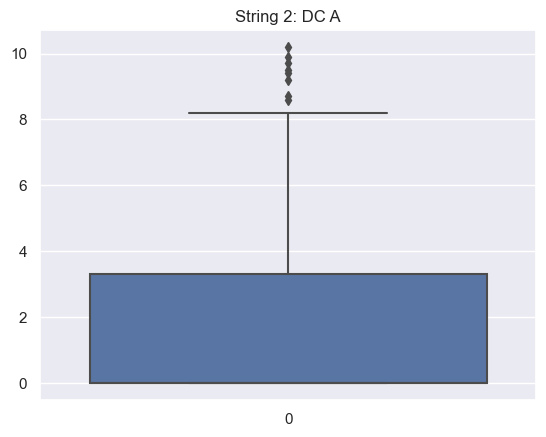

In [38]:
i = floatColmList[5]
outLinerFinder(i)

count    1200.000000
mean      251.093083
std        37.679576
min         0.000000
25%       246.000000
50%       252.000000
75%       260.000000
max       655.000000
Name: AC V, dtype: float64


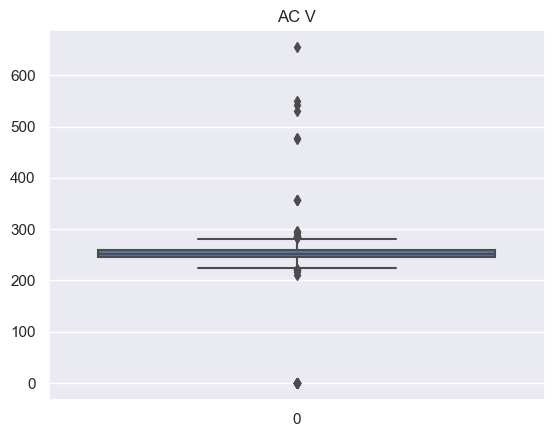

In [39]:
i = floatColmList[6]
outLinerFinder(i)

count    1200.000000
mean        7.006783
std        42.216180
min         0.000000
25%         3.100000
50%         5.400000
75%         7.700000
max      1462.000000
Name: AC A, dtype: float64


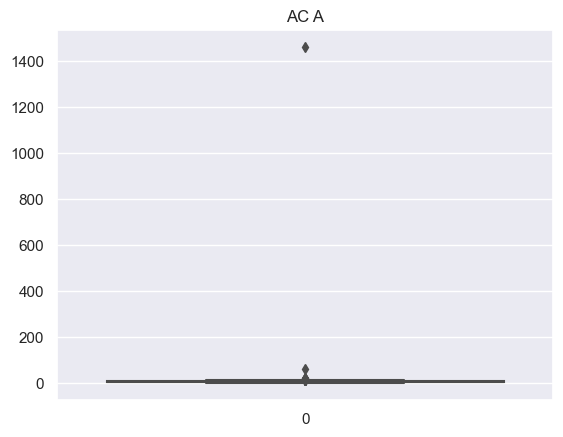

In [40]:
i = floatColmList[7]
outLinerFinder(i)

count    1200.000000
mean     1598.039167
std      1197.519101
min         0.000000
25%       808.000000
50%      1433.000000
75%      2055.000000
max      9910.000000
Name: Power (W), dtype: float64


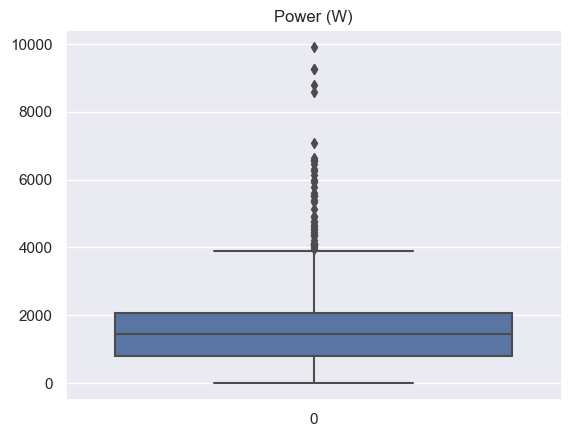

In [41]:
i = floatColmList[8]
outLinerFinder(i)

count      1200.000000
mean       9865.091250
std       16864.033551
min           0.000000
25%        5792.750000
50%        8329.000000
75%       12000.000000
max      562967.000000
Name: E-Total (kWh), dtype: float64


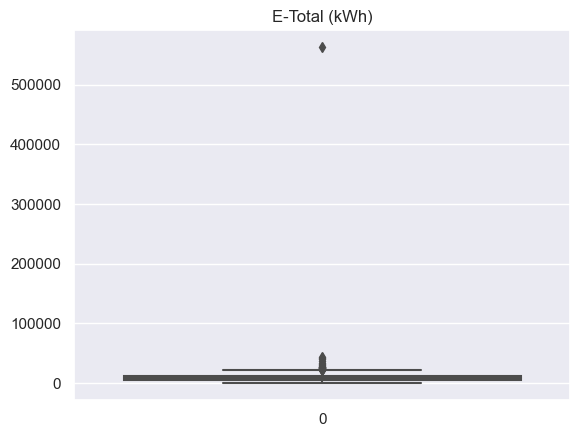

In [42]:
i = floatColmList[9]
outLinerFinder(i)

count      1200.000000
mean      11036.237417
std       13525.750956
min           0.000000
25%        6384.000000
50%        9080.000000
75%       13223.250000
max      411290.000000
Name: Gen. in Solar meter (kWh) , dtype: float64


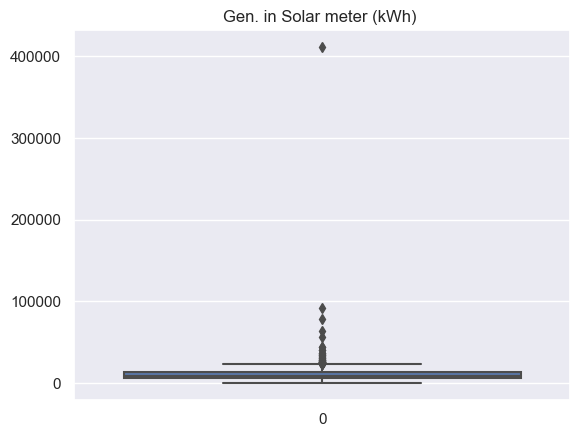

In [43]:
i = floatColmList[10]
outLinerFinder(i)

In [44]:
# Position of the Outlier
print(np.where(dataset[i]>13223))
fixArray = list(np.where(dataset[i]>13223))

(array([   5,   10,   11,   21,   26,   27,   31,   48,   49,   50,   65,
         66,   72,   73,   84,   85,   86,   87,   88,   90,   92,   93,
         96,   98,   99,  102,  104,  105,  110,  111,  113,  114,  115,
        120,  124,  125,  126,  128,  129,  130,  131,  132,  134,  136,
        137,  138,  140,  141,  142,  143,  144,  151,  169,  174,  176,
        178,  179,  180,  181,  183,  186,  189,  191,  193,  196,  197,
        212,  214,  239,  242,  244,  245,  246,  249,  253,  254,  255,
        256,  260,  262,  263,  264,  269,  270,  273,  291,  311,  329,
        331,  344,  351,  353,  362,  368,  370,  373,  391,  399,  409,
        416,  417,  420,  424,  425,  428,  429,  432,  433,  434,  435,
        436,  438,  441,  448,  450,  451,  452,  456,  457,  458,  459,
        460,  463,  465,  473,  485,  486,  497,  517,  518,  522,  524,
        525,  526,  527,  528,  529,  530,  531,  538,  539,  540,  541,
        548,  549,  550,  551,  552,  558,  561,  

In [45]:
fix = dataset[floatColmList[10]]
print(fix.mean())

11036.237416666667


In [46]:
for q in fixArray:
    dataset.loc[q,[floatColmList[10]]] = [11040]

In [47]:
# Position of the Outlier
print(np.where(dataset[i]>13223))
fixArray = list(np.where(dataset[i]>13223))

(array([], dtype=int64),)


### Generalizing a function to fix the outliners

In [48]:
print(floatColmList)
floatColmList.pop(-1)
print(floatColmList)

['PV Cap. from Form', 'Actual DC V', 'String 1: DC V', 'String 1: DC A', 'String 2: DC V', 'String 2: DC A', 'AC V', 'AC A', 'Power (W)', 'E-Total (kWh)', 'Gen. in Solar meter (kWh) ']
['PV Cap. from Form', 'Actual DC V', 'String 1: DC V', 'String 1: DC A', 'String 2: DC V', 'String 2: DC A', 'AC V', 'AC A', 'Power (W)', 'E-Total (kWh)']


In [49]:
def outlineFixer(OutLinerList):
    percentileList = []
    for Name in OutLinerList:
        data = dataframe[Name].describe()
        data = data.to_dict()
        for k, v in data.items():
            if (k == "75%"):
                percentileList.append(v)
    
    i = 0
    for Name in OutLinerList:
        fixArray = list(np.where(dataframe[Name]>percentileList[i]))
        i = i+1
        fix = dataframe[Name]
        meanValue = fix.mean()
        for j in fixArray:
            dataframe.loc[j,[Name]] = [meanValue]

In [50]:
outlineFixer(floatColmList)

#### Cross Checking

count     1200.000000
mean      7747.687237
std       2769.457019
min          0.000000
25%       5792.750000
50%       8329.000000
75%       9865.091250
max      12000.000000
Name: E-Total (kWh), dtype: float64


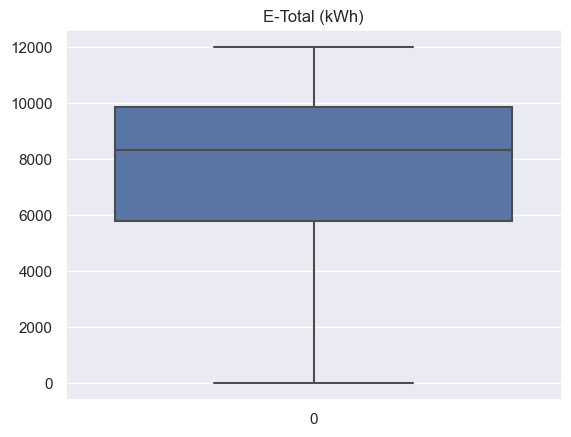

In [51]:
i = floatColmList[-1]
outLinerFinder(i)

### CheckPoint 2 : Creating new CSV with Cleaned Data

In [52]:
dataframe.to_csv('Cleaned_ValidationSheet.csv')

# Model Building

In [53]:
df = pd.read_csv("Cleaned_ValidationSheet.csv")

In [54]:
df.head()

,Unnamed: 0,Sub Division,Year of Installation,Project Name,Meter Installation Date,Village,PV Cap. from Form,Ref. DC V,Actual DC V,String 1: DC V,...,Check List 2: Tightness nearer to meter connection is ok?,Check List 3: Connection of Earthing & L.A. is ok?,Check List 4: DC/AC connector is ok?,Check List 5: Wire Dressing is ok?,Check List 6: Wifi Connection is ok?,Check List 7: Tightness of U & Z clamp is ok?,Check List 8: Colour of Welding Joint is ok?,Check List 9: Concrete Block is there?,Check List 10: Visual checking of all parts,Observation
0,0,VASANA S_D,2018-19,2018-19R0273,1/28/2019,Gulab vatika vasana div,3.25,300,311.1,311.10000,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No need,Yes,System working fine
1,1,VASANA S_D,2018-19,2018-19R0216,2/23/2019,Vadodara,3.25,300,310.0,310.00000,...,Yes,Yes,Yes,Yes,Not available,Yes,Yes,02 block concrete work panding,Yes,Concrete block work panding
2,2,VASANA S_D,2017-18,2017-18R0067,2/4/2018,Vadodara,1.92,180,183.4,183.40000,...,Yes,Yes,Yes,Yes,WiFi user ID not supported,Yes,Yes,Not applicable,Yes,Na
3,3,VASANA S_D,2019-20,2019-20R0252,1/8/2020,Vadodara,3.30,300,353.0,301.87175,...,Yes,Yes,Yes,Yes,WiFi not in range,Yes,Yes,03 block concrete work panding,Yes,Concrete work panding
4,4,VASANA S_D,2019-20,2019-20R0253,1/8/2020,Vadodara,3.30,300,338.0,301.87175,...,Yes,Yes,Yes,Yes,WiFi user name not supported,Yes,Yes,Yes,Yes,Na


In [55]:
columnToDrop = 0
columnList = []
columnList = df.columns.values
placeHolder = columnList[0]
df.drop([placeHolder], axis = 1, inplace = True)
# here we dropped unnamed

In [56]:
df.head(1)

,Sub Division,Year of Installation,Project Name,Meter Installation Date,Village,PV Cap. from Form,Ref. DC V,Actual DC V,String 1: DC V,String 1: DC A,...,Check List 2: Tightness nearer to meter connection is ok?,Check List 3: Connection of Earthing & L.A. is ok?,Check List 4: DC/AC connector is ok?,Check List 5: Wire Dressing is ok?,Check List 6: Wifi Connection is ok?,Check List 7: Tightness of U & Z clamp is ok?,Check List 8: Colour of Welding Joint is ok?,Check List 9: Concrete Block is there?,Check List 10: Visual checking of all parts,Observation
0,VASANA S_D,2018-19,2018-19R0273,1/28/2019,Gulab vatika vasana div,3.25,300,311.1,311.1,3.942525,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No need,Yes,System working fine


# Encoding Target Variable

In [57]:
value_counts = df['Observation'].value_counts()
print(value_counts)

Observation
Ok                                                                        641
Normal                                                                    175
Ok cebal ty correct                                                        61
Ok,cebal ty correct                                                        38
Plant running normal conditions                                            18
                                                                         ... 
Ok/ cebal ty correct                                                        1
Ok /(cebal ty)correct                                                       1
Ok(luping change karyu shedo auto hato,cebal ty correct                     1
Ok (cebal ty correct)                                                       1
Ok/L.a no road hatavano che + la no road ek nakhvano baki che a nakhvo      1
Name: count, Length: 184, dtype: int64


In [58]:
myDict = {}
valueCount = value_counts.to_dict()
for k,v in valueCount.items():
    if (k=='Ok' or k=='Normal'):
        newKey = k
        newValue = 1
        myDict[newKey] = newValue
    else:
        myDict[k] = -1

In [59]:
print(myDict)

{'Ok': 1, 'Normal': 1, 'Ok cebal ty correct ': -1, 'Ok,cebal ty correct ': -1, 'Plant running normal conditions': -1, 'Ok ': -1, 'Na': -1, 'All system ok': -1, 'Ok/cebal ty correct ': -1, 'Ok, cebal ty correct ': -1, '0': -1, 'System ok': -1, 'Ok ,cebal ty correct ': -1, 'Ok,cabal ty correct ': -1, 'Concrete block work panding': -1, 'All system ok. ': -1, 'Ok cabal ty correct ': -1, 'Cebal ty correct ': -1, 'Wifi installed': -1, 'No': -1, 'Ok wi fi configuration karyu': -1, 'G. E. B. No power nathi gar ma': -1, 'G. E. B no power nathi gar ma': -1, 'Ok,': -1, 'Ok, cebal ty correct, sedaling correct ': -1, 'Ok cebal ty correct, penal clining nathi': -1, 'Ok cebal ty correct, penal clining nathi ': -1, 'On': -1, 'System working fine': -1, 'Sprinkle fitted by other party': -1, 'One U clamp tightness done': -1, 'Ok,, cebal ty correct ': -1, 'Solar meter badlavelu. Che': -1, 'Panel not clean properly': -1, 'Ok, cebal ty correct, sedaling ': -1, 'Ok,cebal ty correct  ,wi fi installation karyu

In [60]:
df['O_encoded'] = df['Observation'].map(myDict)

In [61]:
df.drop(['Observation'], axis = 1, inplace = True)
# here we have selected the columns that we dont want in our dataset

In [62]:
df.head()

,Sub Division,Year of Installation,Project Name,Meter Installation Date,Village,PV Cap. from Form,Ref. DC V,Actual DC V,String 1: DC V,String 1: DC A,...,Check List 2: Tightness nearer to meter connection is ok?,Check List 3: Connection of Earthing & L.A. is ok?,Check List 4: DC/AC connector is ok?,Check List 5: Wire Dressing is ok?,Check List 6: Wifi Connection is ok?,Check List 7: Tightness of U & Z clamp is ok?,Check List 8: Colour of Welding Joint is ok?,Check List 9: Concrete Block is there?,Check List 10: Visual checking of all parts,O_encoded
0,VASANA S_D,2018-19,2018-19R0273,1/28/2019,Gulab vatika vasana div,3.25,300,311.1,311.10000,3.942525,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No need,Yes,-1
1,VASANA S_D,2018-19,2018-19R0216,2/23/2019,Vadodara,3.25,300,310.0,310.00000,3.942525,...,Yes,Yes,Yes,Yes,Not available,Yes,Yes,02 block concrete work panding,Yes,-1
2,VASANA S_D,2017-18,2017-18R0067,2/4/2018,Vadodara,1.92,180,183.4,183.40000,3.942525,...,Yes,Yes,Yes,Yes,WiFi user ID not supported,Yes,Yes,Not applicable,Yes,-1
3,VASANA S_D,2019-20,2019-20R0252,1/8/2020,Vadodara,3.30,300,353.0,301.87175,5.300000,...,Yes,Yes,Yes,Yes,WiFi not in range,Yes,Yes,03 block concrete work panding,Yes,-1
4,VASANA S_D,2019-20,2019-20R0253,1/8/2020,Vadodara,3.30,300,338.0,301.87175,5.400000,...,Yes,Yes,Yes,Yes,WiFi user name not supported,Yes,Yes,Yes,Yes,-1


## Encoding

In [63]:
from sklearn.preprocessing import LabelEncoder
temp = []
for column in df.columns:
    if df[column].dtype == 'object':  # check if column is categorical       
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        df[column] = df[column].astype('category')  # convert back to categorical data type


In [64]:
df.head()

,Sub Division,Year of Installation,Project Name,Meter Installation Date,Village,PV Cap. from Form,Ref. DC V,Actual DC V,String 1: DC V,String 1: DC A,...,Check List 2: Tightness nearer to meter connection is ok?,Check List 3: Connection of Earthing & L.A. is ok?,Check List 4: DC/AC connector is ok?,Check List 5: Wire Dressing is ok?,Check List 6: Wifi Connection is ok?,Check List 7: Tightness of U & Z clamp is ok?,Check List 8: Colour of Welding Joint is ok?,Check List 9: Concrete Block is there?,Check List 10: Visual checking of all parts,O_encoded
0,73,2,255,38,87,3.25,15,311.1,311.10000,3.942525,...,2,9,4,26,55,4,18,22,4,-1
1,73,2,221,152,264,3.25,15,310.0,310.00000,3.942525,...,2,9,4,26,26,4,18,1,4,-1
2,73,1,49,164,264,1.92,1,183.4,183.40000,3.942525,...,2,9,4,26,49,4,18,24,4,-1
3,73,3,534,59,264,3.30,15,353.0,301.87175,5.300000,...,2,9,4,26,47,4,18,2,4,-1
4,73,3,535,59,264,3.30,15,338.0,301.87175,5.400000,...,2,9,4,26,50,4,18,42,4,-1


In [65]:
dataTypes = df.dtypes
print(dataTypes)
print(type(dataTypes))
dataTypes = dataTypes.to_dict()

Sub Division                                                 category
Year of Installation                                         category
Project Name                                                 category
Meter Installation Date                                      category
Village                                                      category
PV Cap. from Form                                             float64
Ref. DC V                                                    category
Actual DC V                                                   float64
String 1: DC V                                                float64
String 1: DC A                                                float64
String 2: DC V                                                float64
String 2: DC A                                                float64
AC V                                                          float64
AC A                                                          float64
Power (W)           

## Statistics: Scaling Column with high variance

#### Changing the encoded columns to float

In [66]:
colmList = []
for k, v in dataTypes.items():
    if (v!= float):     # hence category
        colmList.append(k)
print(colmList)

['Sub Division', 'Year of Installation', 'Project Name', 'Meter Installation Date', 'Village', 'Ref. DC V', 'E-Today (kWh)', 'Avg. Solar generation per kW', 'Verified', 'Current Status of Inverter', 'Check List 1: Connection tightness of AC/DC box is ok?', 'Check List 2: Tightness nearer to meter connection is ok?', 'Check List 3: Connection of Earthing & L.A. is ok?', 'Check List 4: DC/AC connector is ok?', 'Check List 5: Wire Dressing is ok?', 'Check List 6: Wifi Connection is ok?', 'Check List 7: Tightness of U & Z clamp is ok?', 'Check List 8: Colour of  Welding Joint is ok?', 'Check List 9: Concrete Block is there?', 'Check  List 10: Visual checking of all parts', 'O_encoded']


In [67]:
def typeChanger(name):
    df[name] = df[name].astype('float')

In [68]:
for i in colmList:
    typeChanger(i)

In [69]:
dataTypes = df.dtypes
print(dataTypes)
print(type(dataTypes))
dataTypes = dataTypes.to_dict()

Sub Division                                                 float64
Year of Installation                                         float64
Project Name                                                 float64
Meter Installation Date                                      float64
Village                                                      float64
PV Cap. from Form                                            float64
Ref. DC V                                                    float64
Actual DC V                                                  float64
String 1: DC V                                               float64
String 1: DC A                                               float64
String 2: DC V                                               float64
String 2: DC A                                               float64
AC V                                                         float64
AC A                                                         float64
Power (W)                         

In [70]:
moreVariance = []

In [71]:
def varianceCalculator(colmName):
    variance = df[colmName].var()
    if (variance>100):
        print(colmName)
        print(variance)
        moreVariance.append(colmName)

In [72]:
def scaler(Name):
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    df[Name] = scaler.fit_transform(df[[Name]])


In [73]:
colmList = []
for k, v in dataTypes.items():
    if (v == float):
        colmList.append(k)
print(colmList)

['Sub Division', 'Year of Installation', 'Project Name', 'Meter Installation Date', 'Village', 'PV Cap. from Form', 'Ref. DC V', 'Actual DC V', 'String 1: DC V', 'String 1: DC A', 'String 2: DC V', 'String 2: DC A', 'AC V', 'AC A', 'Power (W)', 'E-Today (kWh)', 'E-Total (kWh)', 'Gen. in Solar meter (kWh) ', 'Avg. Solar generation per kW', 'Verified', 'Current Status of Inverter', 'Check List 1: Connection tightness of AC/DC box is ok?', 'Check List 2: Tightness nearer to meter connection is ok?', 'Check List 3: Connection of Earthing & L.A. is ok?', 'Check List 4: DC/AC connector is ok?', 'Check List 5: Wire Dressing is ok?', 'Check List 6: Wifi Connection is ok?', 'Check List 7: Tightness of U & Z clamp is ok?', 'Check List 8: Colour of  Welding Joint is ok?', 'Check List 9: Concrete Block is there?', 'Check  List 10: Visual checking of all parts', 'O_encoded']


In [74]:
for i in colmList:
    varianceCalculator(i)

Sub Division
541.441131498471
Project Name
107284.53569015846
Meter Installation Date
11871.784314011677
Village
8489.024352933
Actual DC V
6918.887154143119
String 1: DC V
1937.112216707381
String 2: DC V
8540.71554079623
AC V
863.1688616164092
Power (W)
298541.14973532624
E-Today (kWh)
2421.9766444259103
E-Total (kWh)
7669892.180528501
Gen. in Solar meter (kWh) 
182945938.92491242
Avg. Solar generation per kW
2320.788156797331
Check List 6: Wifi Connection is ok?
130.3147511815402


In [75]:
for i in moreVariance:
    scaler(i)

In [76]:
df.head()

,Sub Division,Year of Installation,Project Name,Meter Installation Date,Village,PV Cap. from Form,Ref. DC V,Actual DC V,String 1: DC V,String 1: DC A,...,Check List 2: Tightness nearer to meter connection is ok?,Check List 3: Connection of Earthing & L.A. is ok?,Check List 4: DC/AC connector is ok?,Check List 5: Wire Dressing is ok?,Check List 6: Wifi Connection is ok?,Check List 7: Tightness of U & Z clamp is ok?,Check List 8: Colour of Welding Joint is ok?,Check List 9: Concrete Block is there?,Check List 10: Visual checking of all parts,O_encoded
0,1.530936,2.0,-0.934472,-1.334996,-0.525539,3.25,15.0,-0.647698,0.625187,3.942525,...,2.0,9.0,4.0,26.0,0.807423,4.0,18.0,22.0,4.0,-1.0
1,1.530936,2.0,-1.038319,-0.288282,1.396337,3.25,15.0,-0.660928,0.600184,3.942525,...,2.0,9.0,4.0,26.0,-1.734031,4.0,18.0,1.0,4.0,-1.0
2,1.530936,1.0,-1.563659,-0.178102,1.396337,1.92,1.0,-2.183566,-2.277462,3.942525,...,2.0,9.0,4.0,26.0,0.281605,4.0,18.0,24.0,4.0,-1.0
3,1.530936,3.0,-0.082321,-1.142180,1.396337,3.30,15.0,-0.143760,0.415427,5.300000,...,2.0,9.0,4.0,26.0,0.106332,4.0,18.0,2.0,4.0,-1.0
4,1.530936,3.0,-0.079267,-1.142180,1.396337,3.30,15.0,-0.324167,0.415427,5.400000,...,2.0,9.0,4.0,26.0,0.369241,4.0,18.0,42.0,4.0,-1.0


## Pruning

In [77]:
df.isnull().sum()
# if the corresponding outputs are zero then there is no missing data

Sub Division                                                 0
Year of Installation                                         0
Project Name                                                 0
Meter Installation Date                                      0
Village                                                      0
PV Cap. from Form                                            0
Ref. DC V                                                    0
Actual DC V                                                  0
String 1: DC V                                               0
String 1: DC A                                               0
String 2: DC V                                               0
String 2: DC A                                               0
AC V                                                         0
AC A                                                         0
Power (W)                                                    0
E-Today (kWh)                                          

In [85]:
columnList = []
columnList = df.columns.values
print(columnList)
len(columnList)
# printing the columns in list

['Sub Division' 'Year of Installation' 'Project Name'
 'Meter Installation Date' 'Village' 'PV Cap. from Form' 'Ref. DC V'
 'Actual DC V' 'String 1: DC V' 'String 1: DC A' 'String 2: DC V'
 'String 2: DC A' 'AC V' 'AC A' 'Power (W)' 'E-Today (kWh)'
 'E-Total (kWh)' 'Gen. in Solar meter (kWh) '
 'Avg. Solar generation per kW' 'Verified' 'Current Status of Inverter'
 'Check List 1: Connection tightness of AC/DC box is ok?'
 'Check List 2: Tightness nearer to meter connection is ok?'
 'Check List 3: Connection of Earthing & L.A. is ok?'
 'Check List 4: DC/AC connector is ok?'
 'Check List 5: Wire Dressing is ok?'
 'Check List 6: Wifi Connection is ok?'
 'Check List 7: Tightness of U & Z clamp is ok?'
 'Check List 8: Colour of  Welding Joint is ok?'
 'Check List 9: Concrete Block is there?'
 'Check  List 10: Visual checking of all parts' 'O_encoded']


32

In [86]:
columnToDrop = [0,1,2,5,6,8,9,10,11,12,13,17,18,19]
columnDropped = []
for i in columnToDrop:
    placeHolder = columnList[i]
    columnDropped.append(placeHolder)
    df.drop([placeHolder], axis = 1, inplace = True)
# here we have selected the columns that we dont want in our dataset

In [95]:
df.isnull().sum()
# if the corresponding outputs are zero then there is no missing data

Meter Installation Date                                      0
Village                                                      0
Actual DC V                                                  0
Power (W)                                                    0
E-Today (kWh)                                                0
E-Total (kWh)                                                0
Current Status of Inverter                                   0
Check List 1: Connection tightness of AC/DC box is ok?       0
Check List 2: Tightness nearer to meter connection is ok?    0
Check List 3: Connection of Earthing & L.A. is ok?           0
Check List 4: DC/AC connector is ok?                         0
Check List 5: Wire Dressing is ok?                           0
Check List 6: Wifi Connection is ok?                         0
Check List 7: Tightness of U & Z clamp is ok?                0
Check List 8: Colour of  Welding Joint is ok?                0
Check List 9: Concrete Block is there?                 

In [93]:
df.head()

,Meter Installation Date,Village,Actual DC V,Power (W),E-Today (kWh),E-Total (kWh),Current Status of Inverter,Check List 1: Connection tightness of AC/DC box is ok?,Check List 2: Tightness nearer to meter connection is ok?,Check List 3: Connection of Earthing & L.A. is ok?,Check List 4: DC/AC connector is ok?,Check List 5: Wire Dressing is ok?,Check List 6: Wifi Connection is ok?,Check List 7: Tightness of U & Z clamp is ok?,Check List 8: Colour of Welding Joint is ok?,Check List 9: Concrete Block is there?,Check List 10: Visual checking of all parts,O_encoded
0,-1.334996,-0.525539,-0.647698,0.700832,1.011287,-0.382071,2.0,2.0,2.0,9.0,4.0,26.0,0.807423,4.0,18.0,22.0,4.0,-1.0
1,-0.288282,1.396337,-0.660928,0.700832,-1.224800,1.174840,2.0,2.0,2.0,9.0,4.0,26.0,-1.734031,4.0,18.0,1.0,4.0,-1.0
2,-0.178102,1.396337,-2.183566,-0.075566,0.421773,0.387715,2.0,2.0,2.0,9.0,4.0,26.0,0.281605,4.0,18.0,24.0,4.0,-1.0
3,-1.142180,1.396337,-0.143760,1.176810,-1.224800,-0.112953,2.0,2.0,2.0,9.0,4.0,26.0,0.106332,4.0,18.0,2.0,4.0,-1.0
4,-1.142180,1.396337,-0.324167,1.174979,-1.123160,-0.179419,2.0,2.0,2.0,9.0,4.0,26.0,0.369241,4.0,18.0,42.0,4.0,-1.0


## Decision Tree

In [87]:
X = df.iloc[:, :-1].values  #Independent Variables
y = df.iloc[:, -1].values   #Dependent Variables

In [88]:
X.shape, y.shape

((1200, 17), (1200,))

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [90]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(splitter= 'random', random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0, splitter='random')

In [91]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[-1. -1.]
 [ 1.  1.]
 [-1. -1.]
 [ 1. -1.]
 [-1. -1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]
 [-1. -1.]
 [ 1.  1.]
 [-1.  1.]
 [-1.  1.]
 [ 1.  1.]
 [ 1.  1.]
 [-1.  1.]
 [ 1. -1.]
 [ 1. -1.]
 [ 1.  1.]
 [ 1. -1.]
 [-1. -1.]
 [ 1.  1.]
 [ 1.  1.]
 [-1. -1.]
 [-1. -1.]
 [-1.  1.]
 [-1.  1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1. -1.]
 [-1.  1.]
 [ 1. -1.]
 [ 1.  1.]
 [-1. -1.]
 [-1. -1.]
 [ 1.  1.]
 [ 1. -1.]
 [ 1.  1.]
 [ 1. -1.]
 [-1. -1.]
 [ 1.  1.]
 [-1. -1.]
 [ 1. -1.]
 [-1.  1.]
 [-1. -1.]
 [ 1. -1.]
 [-1.  1.]
 [ 1.  1.]
 [ 1. -1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]
 [-1. -1.]
 [ 1.  1.]
 [-1. -1.]
 [ 1. -1.]
 [-1. -1.]
 [ 1. -1.]
 [ 1.  1.]
 [ 1.  1.]
 [-1. -1.]
 [ 1. -1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1. -1.]
 [ 1.  1.]
 [-1.  1.]
 [ 1.  1.]
 [ 1. -1.]
 [ 1.  1.]
 [ 1. -1.]
 [ 1.  1.]
 [-1. -1.]
 [ 1. -1.]
 [-1.  1.]
 [ 1.  1.]
 [ 1.  1.]
 [-1. -1.]
 [-1.  1.]
 [ 1.  1.]
 [-1.  1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]
 [-1.  1.]
 [-1. -1.]

# Prediction

In [96]:
print("Please enter the following details to check if you need maintainance")
check = ["Meter Installation Date", "Village", "Actual DC Voltage", "Power", "E-Today", "E-Total", "Current Status of Inverter", "Connection Tightness of AC/DC box", "Tightness Nearer to meter box", "Connection of Earthing", "DC/AC Connection", "Wire Dressing", "Wifi Connection", "Tightness of U and Z clamp", "Color of welding Joint", "Presence of Concrete Block", "Visual Checking of All Parts",]

Please enter the following details to check if you need maintainance


In [120]:
print("Please enter the following details to check if you need maintainance")
check = ["Meter Installation Date [dd/mm/yyyy]", "Village", "Actual DC Voltage", "Power", "E-Today(KWh)", "E-Total(KWh)", "Current Status of Inverter", "Connection Tightness of AC/DC box", "Tightness Nearer to meter box", "Connection of Earthing", "DC/AC Connection", "Wire Dressing", "Wifi Connection", "Tightness of U and Z clamp", "Color of welding Joint", "Presence of Concrete Block", "Visual Checking of All Parts",]

i = ""
j = 0
inputUser = []
for i in check:
    if (j<6):
        print("Enter-> ", i)
        variable = str(input())
    if (j==6):
        print("Enter-> ", i, "if everything is fine enter [Normal]")
        variable = str(input())
    if (j>6):
        print("Enter-> ", i, "if everything is find enter [Yes] or [Normal]")
        variable = str(input())
    inputUser.append(variable)
    j = j+1

Please enter the following details to check if you need maintainance
Enter->  Meter Installation Date [dd/mm/yyyy]
Enter->  Village
Enter->  Actual DC Voltage
Enter->  Power
Enter->  E-Today
Enter->  E-Total
Enter->  Current Status of Inverter if everything is fine enter [Normal]
Enter->  Connection Tightness of AC/DC box if everything is find enter [Yes] or [Normal]
Enter->  Tightness Nearer to meter box if everything is find enter [Yes] or [Normal]
Enter->  Connection of Earthing if everything is find enter [Yes] or [Normal]
Enter->  DC/AC Connection if everything is find enter [Yes] or [Normal]
Enter->  Wire Dressing if everything is find enter [Yes] or [Normal]
Enter->  Wifi Connection if everything is find enter [Yes] or [Normal]
Enter->  Tightness of U and Z clamp if everything is find enter [Yes] or [Normal]
Enter->  Color of welding Joint if everything is find enter [Yes] or [Normal]
Enter->  Presence of Concrete Block if everything is find enter [Yes] or [Normal]
Enter->  Visu

In [121]:
column_names = check
values = inputUser

data = [values]  # Wrap values in a list to create a row

df = pd.DataFrame(data, columns=column_names)
df.to_csv('output.csv', index=False)

In [122]:
prediction = pd.read_csv("output.csv")

In [123]:
prediction.head(3)

,Meter Installation Date [dd/mm/yyyy],Village,Actual DC Voltage,Power,E-Today,E-Total,Current Status of Inverter,Connection Tightness of AC/DC box,Tightness Nearer to meter box,Connection of Earthing,DC/AC Connection,Wire Dressing,Wifi Connection,Tightness of U and Z clamp,Color of welding Joint,Presence of Concrete Block,Visual Checking of All Parts
0,23/11/2017,Surat,34,12,123,43,34,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal


In [124]:
df = prediction.copy()

### Encoding

In [125]:
from sklearn.preprocessing import LabelEncoder
temp = []
for column in df.columns:
    if df[column].dtype == 'object':  # check if column is categorical       
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        df[column] = df[column].astype('category')  # convert back to categorical data type


In [126]:
df.head()


,Meter Installation Date [dd/mm/yyyy],Village,Actual DC Voltage,Power,E-Today,E-Total,Current Status of Inverter,Connection Tightness of AC/DC box,Tightness Nearer to meter box,Connection of Earthing,DC/AC Connection,Wire Dressing,Wifi Connection,Tightness of U and Z clamp,Color of welding Joint,Presence of Concrete Block,Visual Checking of All Parts
0,0,0,34,12,123,43,34,0,0,0,0,0,0,0,0,0,0


In [128]:
X = df.iloc[:, :].values  #Independent Variables

# If the output of the code is -1 then maintenance is needed if 1 then no maintenance

In [129]:
regressor.predict(X)

array([1.])